In [5]:
# git clone https://github.com/alsinmr/pyRelaxSim.git
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
sys.path.append('/Users/albertsmith/Documents/GitHub')
import pyRelaxSim as RS
import numpy as np
from numpy import pi
RS.Defaults['parallel']=False

In [54]:
%matplotlib notebook

In [55]:
ex=[RS.ExpSys(v0H=600,Nucs=['15N','1H'],pwdavg=RS.PowderAvg('alpha0beta0'),n_gamma=1)]
ex[0].set_inter(Type='CS',i=0,ppm=10)
ex.extend([ex[0].copy(),ex[0].copy(),ex[0].copy()])
for ex0,beta,gamma in zip(ex,[0,109.47*pi/180,109.47*pi/180,109.47*pi/180],[0,0,2*pi/3,4*pi/3]):
    ex0.set_inter(Type='dipole',i0=0,i1=1,delta=22000,euler=[0,beta,gamma])
L=RS.Liouvillian(ex)

In [59]:
tc=1e-7
kex=(np.ones([4,4])-np.eye(4)*4)/(4*tc)
L.kex=kex
U=L.U()**50
rho=RS.Rho(rho0='15Nx',detect='15Np',L=L)

In [60]:
rho.DetProp(U,n=1024)

<IPython.core.display.Javascript object>


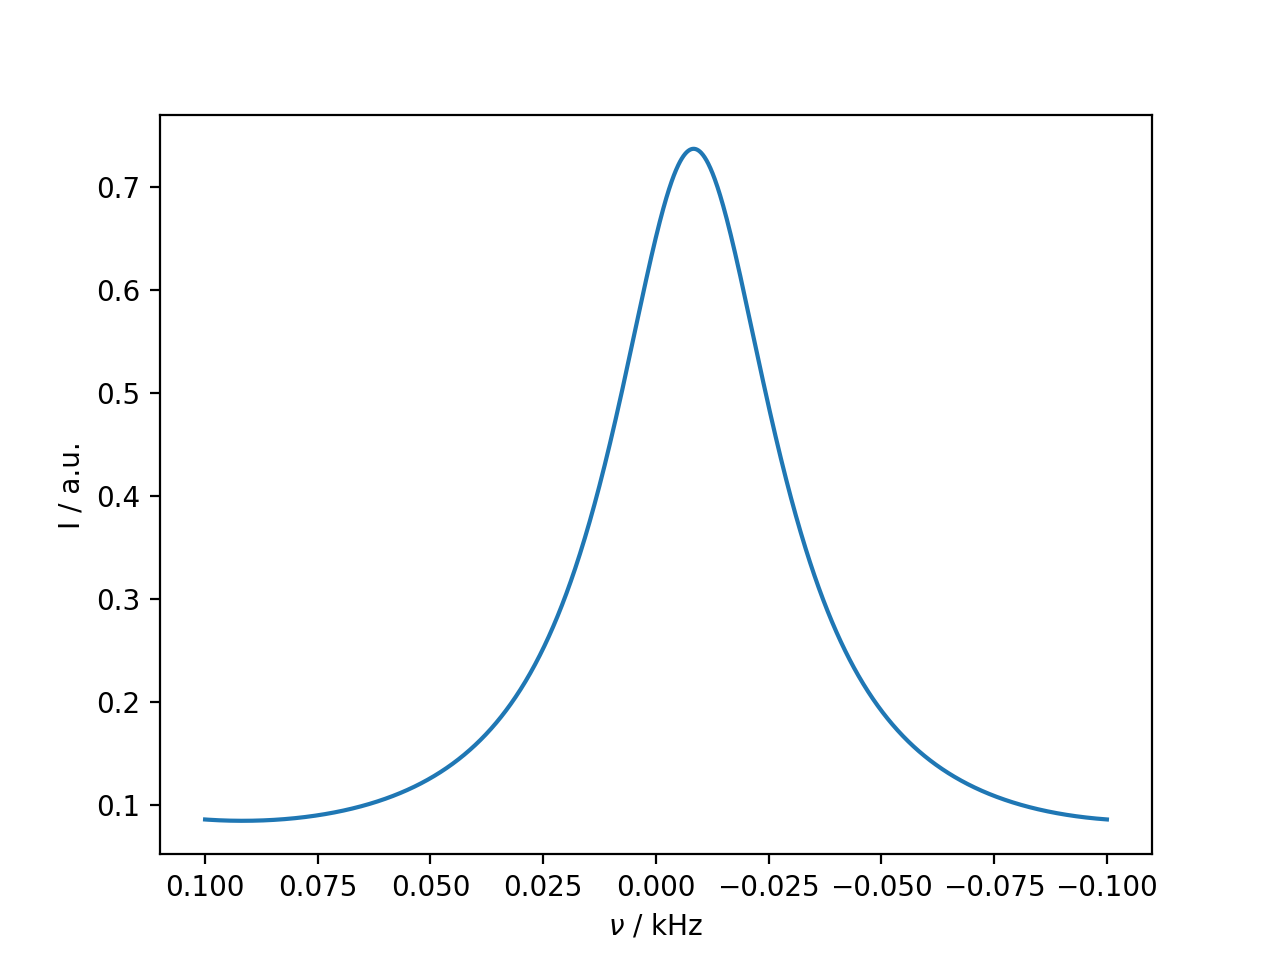

<AxesSubplot:xlabel='$\\nu$ / kHz', ylabel='I / a.u.'>

In [61]:
rho.plot(FT=True,imag=False,apodize=False)